In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix
from imblearn.under_sampling import NearMiss

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
data = pd.read_csv('startup_data.csv')

In [3]:
data.shape

(923, 49)

In [4]:
data_to_test = data.tail(100)
data_to_test.to_csv(r"C:\Users\CChelmi\BBDA_project3_supervised_ML\cleaning\100rowstest_data_for_test", index = False)
data_to_test.index
data.drop(data_to_test.index).head()
data = data.drop(data_to_test.index)
data.shape

(823, 49)

In [5]:
# Transforming the target column to boolian

data.replace(to_replace = ['acquired','closed'],value = [1,0], inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                823 non-null    int64  
 1   state_code                823 non-null    object 
 2   latitude                  823 non-null    float64
 3   longitude                 823 non-null    float64
 4   zip_code                  823 non-null    object 
 5   id                        823 non-null    object 
 6   city                      823 non-null    object 
 7   Unnamed: 6                384 non-null    object 
 8   name                      823 non-null    object 
 9   labels                    823 non-null    int64  
 10  founded_at                823 non-null    object 
 11  closed_at                 302 non-null    object 
 12  first_funding_at          823 non-null    object 
 13  last_funding_at           823 non-null    object 
 14  age_first_

In [7]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  439
name                          0
labels                        0
founded_at                    0
closed_at                   521
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    141
age_last_milestone_year     141
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [8]:
data.isnull().sum().sum()

1243

In [9]:
# Checking for duplicates: 

data['id'].nunique() # so no duplicates

823

In [10]:
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,682.000000,682.000000,823.000000,823.000000,8.230000e+02,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,571.929526,38.514740,-103.387944,0.643985,2.221836,3.913024,3.063513,4.790902,7.731470,2.317132,2.634635e+07,1.839611,0.522479,0.116646,0.091130,0.044957,0.223572,0.167679,0.160389,0.082625,0.081409,0.065614,0.057108,0.029162,0.037667,0.002430,0.315917,0.319563,0.258809,0.516403,0.391252,0.228433,0.099635,2.792424,0.806804,0.643985
std,335.009983,3.669509,22.215104,0.479111,2.500585,2.991667,2.989482,3.263351,7.351255,1.394388,2.006804e+08,1.342198,0.499798,0.321194,0.287969,0.207337,0.416892,0.373808,0.367189,0.275481,0.273629,0.247756,0.232190,0.168362,0.190506,0.049266,0.465163,0.466591,0.438247,0.500035,0.488327,0.420078,0.299695,1.854997,0.395045,0.479111
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,280.500000,37.389551,-122.192337,0.000000,0.580800,1.656150,1.000000,2.397300,3.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,573.000000,37.779281,-118.374037,1.000000,1.471200,3.476700,2.550650,4.475350,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000,1.000000
75%,867.500000,40.730646,-77.090212,1.000000,3.494500,5.523250,4.582225,6.786325,10.000000,3.000000,2.450527e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,1.000000
max,1153.000000,54.983201,-1.574631,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [11]:
# Separate object vs numeric columns:

obj_cols = data.select_dtypes(include='object').columns.to_list()
print(obj_cols)
print(len(obj_cols))

['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code', 'object_id']
13


In [12]:
num_cols = data.select_dtypes(exclude='object').columns.to_list()
print(num_cols)
print(len(num_cols))

['Unnamed: 0', 'latitude', 'longitude', 'labels', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']
36


In [13]:
# Creating a new dataset with the numeric columns so I can create a heatmap to investigate the correlations:

num_df = pd.DataFrame(data[num_cols])
#num_df

<Axes: >

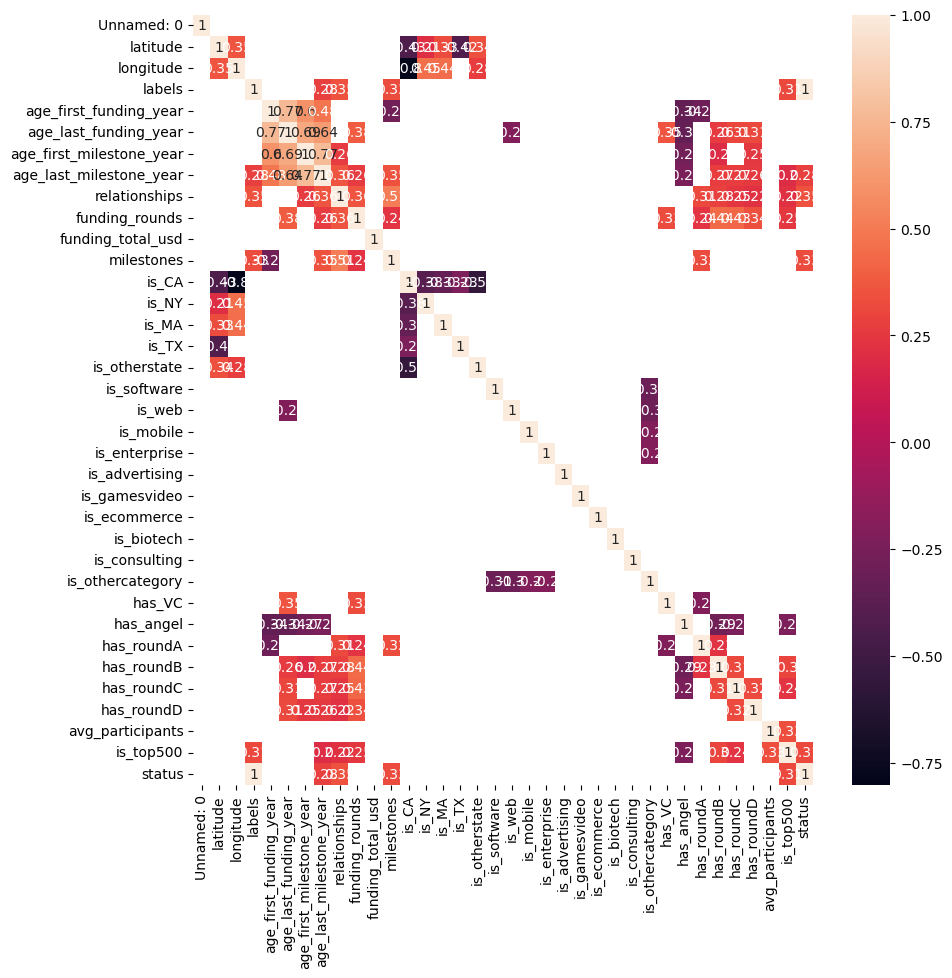

In [14]:
corr = num_df.corr()
high_corr = corr[abs(corr)>0.2]
plt.figure(figsize=(10,10))
sns.heatmap(high_corr, annot = True)

In [15]:
# From the correlation heatmap we understand that we need to drop the following columns:
# Labels is highly correlated with status, will drop
# S

In [16]:
data['state_code'].unique()

array(['CA', 'MA', 'KY', 'NY', 'CO', 'VA', 'TX', 'WA', 'IL', 'NC', 'PA',
       'GA', 'NH', 'MO', 'FL', 'NJ', 'WV', 'MI', 'DC', 'CT', 'MD', 'OH',
       'TN', 'MN', 'RI', 'OR', 'UT', 'ME', 'NV', 'NM', 'IN', 'AZ'],
      dtype=object)

In [17]:
data['state_code'].nunique()

32

In [18]:
# We want to see the top 3 states with the most start ups
data['state_code'].value_counts().head(3)

state_code
CA    431
NY     96
MA     75
Name: count, dtype: int64

In [19]:
data['category_code'].nunique()

35

In [20]:
data['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [21]:
data['category_code'].value_counts().head(10)

category_code
software           138
web                132
mobile              68
enterprise          67
advertising         54
games_video         47
network_hosting     32
biotech             31
semiconductor       28
ecommerce           24
Name: count, dtype: int64

In [22]:
# We only want the top 3 states, so we are moving the Texas start ups in the otherstate column 
data['is_otherstate'] = data['is_otherstate'] + data['is_TX']


In [23]:
# Columns too look into more   'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', : probably to make them dates
# Columns for OHE 'category_code'

In [24]:
# OHE in category_code column, then I will also drop the 

OHE_col = ['category_code']
data = pd.get_dummies(data,columns = OHE_col)
data.replace(to_replace = [True, False],value = [1,0], inplace = True)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Expanding the 4 columns into years and months 
data['founded_at']=pd.to_datetime(data['founded_at'])
data['funded_year']=data['founded_at'].dt.year
#data['funded_month']=data['founded_at'].dt.month
data['funded_year'].info()

data['closed_at']=pd.to_datetime(data['closed_at'])
data['closure_year']=data['closed_at'].dt.year
#data['closure_month']=data['closed_at'].dt.month
data['closure_year'].info()

data['first_funding_at']=pd.to_datetime(data['first_funding_at'])
data['first_funded_year']=data['first_funding_at'].dt.year
#data['first_funded_month']=data['first_funding_at'].dt.month

data['last_funding_at']=pd.to_datetime(data['last_funding_at'])
data['last_funded_year']=data['last_funding_at'].dt.year
#data['last_funded_month']=data['last_funding_at'].dt.month

<class 'pandas.core.series.Series'>
RangeIndex: 823 entries, 0 to 822
Series name: funded_year
Non-Null Count  Dtype
--------------  -----
823 non-null    int32
dtypes: int32(1)
memory usage: 3.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 823 entries, 0 to 822
Series name: closure_year
Non-Null Count  Dtype  
--------------  -----  
302 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [26]:
# Fill in null values on the dates with 0, as we do not have the information:

data['closure_year'] = data['closure_year'].fillna(value=0)
#data['closure_month'] = data['closure_month'].fillna(value=0)
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value=0)
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value=0)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      823 non-null    int64         
 1   state_code                      823 non-null    object        
 2   latitude                        823 non-null    float64       
 3   longitude                       823 non-null    float64       
 4   zip_code                        823 non-null    object        
 5   id                              823 non-null    object        
 6   city                            823 non-null    object        
 7   Unnamed: 6                      384 non-null    object        
 8   name                            823 non-null    object        
 9   labels                          823 non-null    int64         
 10  founded_at                      823 non-null    datetime64[ns]
 11  closed

In [28]:
data.isnull().sum()

Unnamed: 0                          0
state_code                          0
latitude                            0
longitude                           0
zip_code                            0
id                                  0
city                                0
Unnamed: 6                        439
name                                0
labels                              0
founded_at                          0
closed_at                         521
first_funding_at                    0
last_funding_at                     0
age_first_funding_year              0
age_last_funding_year               0
age_first_milestone_year            0
age_last_milestone_year             0
relationships                       0
funding_rounds                      0
funding_total_usd                   0
milestones                          0
state_code.1                        1
is_CA                               0
is_NY                               0
is_MA                               0
is_TX       

In [29]:
data.isnull().sum().sum()

961

In [30]:
# Drop columns with no useful/important information and highly correlated columns

data.drop(['Unnamed: 0', 'Unnamed: 6' , 'zip_code', 'state_code', 'state_code.1', 'name', 'labels', 'is_TX', 'id', 'city', 'object_id', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'] , axis =1, inplace = True)

In [31]:
data.shape

(823, 72)

In [32]:
data.head()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0.0,2005,2009
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,0.0,2010,2010
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,0.0,2005,2007
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2012.0,2010,2012


In [33]:
# Checking for any remaining null values:

data.isnull().sum().sum()

0

<Axes: >

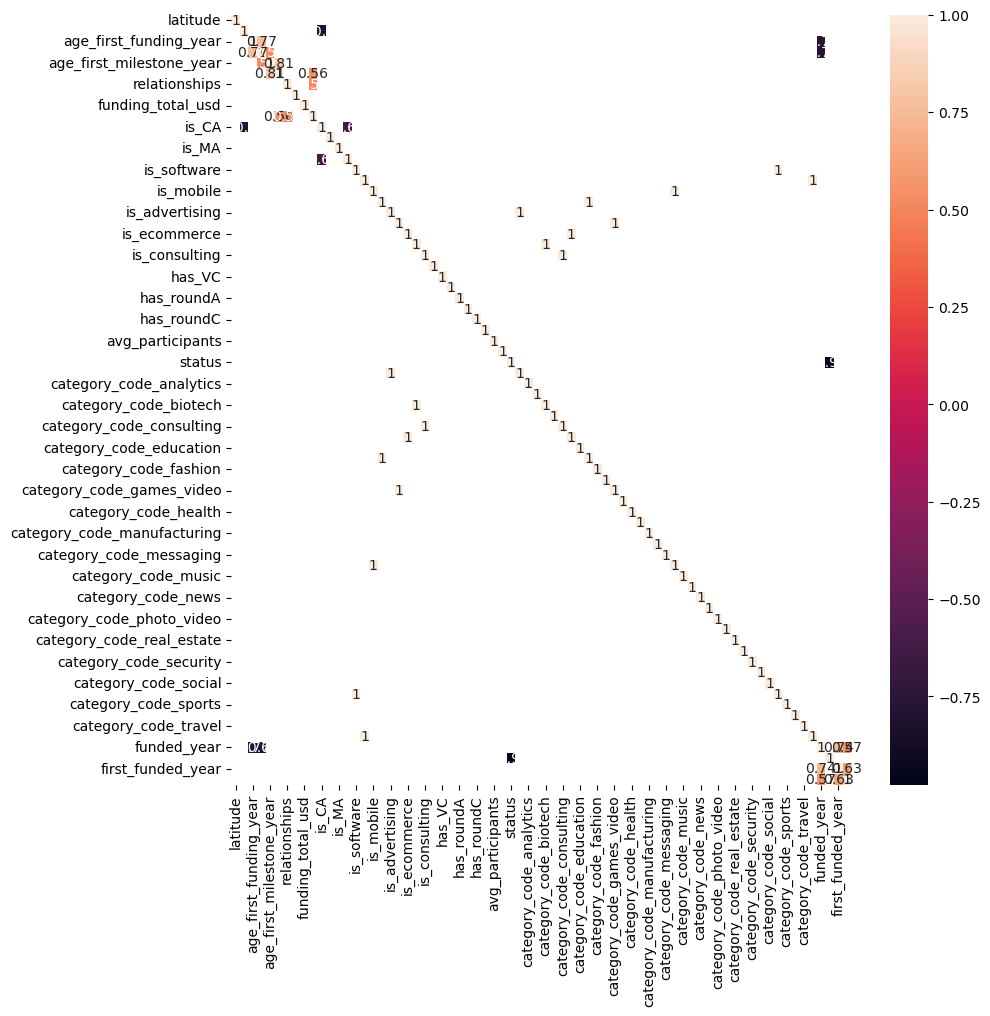

In [34]:
corr = data.corr()
high_corr = corr[abs(corr)>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(high_corr, annot = True)

In [35]:
data['status'].value_counts()

status
1    530
0    293
Name: count, dtype: int64

In [36]:
acquired_df = pd.DataFrame(data[data['status'] == 1])

In [37]:
acquired_df['closure_year'].unique()

array([   0., 2001., 2011., 2009., 2013., 2012., 2008., 2010.])

In [38]:
acquired_df['closure_year'].nunique()

8

In [39]:
acquired_df['closure_year'].value_counts()

# the 0.0 mean that the start up did not close and got acquired 

closure_year
0.0       521
2011.0      3
2001.0      1
2009.0      1
2013.0      1
2012.0      1
2008.0      1
2010.0      1
Name: count, dtype: int64

In [40]:
df = data.copy()

# Model with all features included: 

In [41]:
X = df.drop('status' , axis = 1)
y = df['status']

In [42]:
X.head(5)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0.0,2005,2009
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,0.0,2010,2010
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,0.0,2005,2007
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2012.0,2010,2012


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Now i will scale my data

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Modeling: 

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [46]:
y_pred = rfc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9818181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.97      0.99       105

    accuracy                           0.98       165
   macro avg       0.98      0.99      0.98       165
weighted avg       0.98      0.98      0.98       165



In [47]:
X = df.drop(['status', 'closure_year'], axis = 1)
y = df['status']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Now i will scale my data

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Modeling: 

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:
y_pred = rfc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7575757575757576
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.57      0.63        60
           1       0.78      0.87      0.82       105

    accuracy                           0.76       165
   macro avg       0.74      0.72      0.72       165
weighted avg       0.75      0.76      0.75       165



# Model with feature selection: 

In [52]:
X = df.drop('status' , axis = 1)
y = df['status']

In [53]:
X.head(5)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0.0,2005,2009
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,0.0,2010,2010
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,0.0,2005,2007
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2012.0,2010,2012


In [54]:
#X.info()

In [55]:
# Feature selection - I have not done train test split yet

k = 15
bestfeatures = SelectKBest(score_func = f_classif, k = k)
fit = bestfeatures.fit(X, y)  # As I have not done train test split yet, we only fit. on the X,y variables
dfscores = pd.DataFrame(fit.scores_) # This brings back the score for each column after the .fit
dfcolumns = pd.DataFrame(X.columns) # This brings back the name of each column after the .fit

In [56]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns

featureScores.nlargest(15, 'Score') #sorting and returning only the columns with the top 10 score

,Specs,Score
68,closure_year,16951.519824
5,age_last_milestone_year,131.604839
6,relationships,112.060052
9,milestones,98.497394
31,is_top500,87.943824
4,age_first_milestone_year,62.916974
27,has_roundB,32.695543
30,avg_participants,32.567135
7,funding_rounds,31.723422
13,is_otherstate,27.281775


In [57]:
selected_features = featureScores.nlargest(15, 'Score')['Specs'].values # will return an array of the column names only from the sorted score data
selected_features

array(['closure_year', 'age_last_milestone_year', 'relationships',
       'milestones', 'is_top500', 'age_first_milestone_year',
       'has_roundB', 'avg_participants', 'funding_rounds',
       'is_otherstate', 'has_roundA', 'has_roundC', 'has_roundD',
       'first_funded_year', 'category_code_cleantech'], dtype=object)

In [58]:
X_selected = X[selected_features] # re-creating the X variables to include only the 15 columns with the highest score from the feature selection
#X_selected.head

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [60]:
# Now i will scale, as I have NOW the selected best features 

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Modeling: 

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [62]:
y_pred = rfc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9818181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.97      0.99       105

    accuracy                           0.98       165
   macro avg       0.98      0.99      0.98       165
weighted avg       0.98      0.98      0.98       165



# Droping also closure year from X to check again the scores 

In [63]:
X = df.drop(['status', 'closure_year'], axis = 1)
y = df['status']

In [64]:
# Feature selection - I have not done train test split yet

k = 15
bestfeatures = SelectKBest(score_func = f_classif, k = k)
fit = bestfeatures.fit(X, y)  # As I have not done train test split yet, we only fit. on the X,y variables
dfscores = pd.DataFrame(fit.scores_) # This brings back the score for each column after the .fit
dfcolumns = pd.DataFrame(X.columns) # This brings back the name of each column after the .fit

In [65]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns

featureScores.nlargest(15, 'Score') #sorting and returning only the columns with the top 10 score

,Specs,Score
5,age_last_milestone_year,131.604839
6,relationships,112.060052
9,milestones,98.497394
31,is_top500,87.943824
4,age_first_milestone_year,62.916974
27,has_roundB,32.695543
30,avg_participants,32.567135
7,funding_rounds,31.723422
13,is_otherstate,27.281775
26,has_roundA,27.265785


In [66]:
selected_features = featureScores.nlargest(15, 'Score')['Specs'].values # will return an array of the column names only from the sorted score data
selected_features

array(['age_last_milestone_year', 'relationships', 'milestones',
       'is_top500', 'age_first_milestone_year', 'has_roundB',
       'avg_participants', 'funding_rounds', 'is_otherstate',
       'has_roundA', 'has_roundC', 'has_roundD', 'first_funded_year',
       'category_code_cleantech', 'is_MA'], dtype=object)

In [67]:
X_selected = X[selected_features] # re-creating the X variables to include only the 15 columns with the highest score from the feature selection

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [69]:
# Now i will scale, as I have NOW the selected best features 

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Modeling: 

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [71]:
y_pred = rfc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.53      0.63        60
           1       0.77      0.90      0.83       105

    accuracy                           0.77       165
   macro avg       0.77      0.72      0.73       165
weighted avg       0.77      0.77      0.76       165



# New dataframe creation: We clearly can see that closure_year columns created overfitting on our data so we will create a new dataframe without this column and we will continue working with this as base going forward.

In [72]:
data_clean = df.copy()

In [73]:
data_clean.columns

Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'category_code_advertising',
       'category_code_analytics', 'category_code_automotive',
       'category_code_biotech', 'category_code_cleantech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_fashion', 'category_code_finance',
       'category_code_games_video', 'category_code_hardware',
       'category_cod

In [74]:
data_clean.drop('closure_year', axis =1, inplace = True)

In [75]:
data_clean.columns

Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'category_code_advertising',
       'category_code_analytics', 'category_code_automotive',
       'category_code_biotech', 'category_code_cleantech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_fashion', 'category_code_finance',
       'category_code_games_video', 'category_code_hardware',
       'category_cod

In [76]:
df2 = data_clean.copy()

# Model Tuning 

In [77]:
X = df2.drop('status', axis = 1)
y = df2['status']

In [78]:
y.value_counts()

status
1    530
0    293
Name: count, dtype: int64

In [79]:
# We will also try downsampling to fix the clear imbalance of our data

In [80]:
# Feature selection - I have not done train test split yet

k = 15
bestfeatures = SelectKBest(score_func = f_classif, k = k)
fit = bestfeatures.fit(X, y)  # As I have not done train test split yet, we only fit. on the X,y variables
dfscores = pd.DataFrame(fit.scores_) # This brings back the score for each column after the .fit
dfcolumns = pd.DataFrame(X.columns) # This brings back the name of each column after the .fit

In [81]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns

featureScores.nlargest(15, 'Score') #sorting and returning only the columns with the top 15 score

,Specs,Score
5,age_last_milestone_year,131.604839
6,relationships,112.060052
9,milestones,98.497394
31,is_top500,87.943824
4,age_first_milestone_year,62.916974
27,has_roundB,32.695543
30,avg_participants,32.567135
7,funding_rounds,31.723422
13,is_otherstate,27.281775
26,has_roundA,27.265785


In [82]:
selected_features = featureScores.nlargest(15, 'Score')['Specs'].values # will return an array of the column names only from the sorted score data
selected_features

array(['age_last_milestone_year', 'relationships', 'milestones',
       'is_top500', 'age_first_milestone_year', 'has_roundB',
       'avg_participants', 'funding_rounds', 'is_otherstate',
       'has_roundA', 'has_roundC', 'has_roundD', 'first_funded_year',
       'category_code_cleantech', 'is_MA'], dtype=object)

In [83]:
X_selected = X[selected_features] # re-creating the X variables to include only the 10 columns with the highest score from the feature selection

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [85]:
X_train.head(2)

,age_last_milestone_year,relationships,milestones,is_top500,age_first_milestone_year,has_roundB,avg_participants,funding_rounds,is_otherstate,has_roundA,has_roundC,has_roundD,first_funded_year,category_code_cleantech,is_MA
239,3.3370,17,4,1,1.0877,0,1.6667,3,1,1,0,0,2007,0,0
707,4.0027,2,1,1,4.0027,1,4.0000,3,0,1,1,0,2005,0,0


In [86]:
# Now i will scale, as I have NOW the selected best features 

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
# Downsampling with nearmiss 

undersample = NearMiss(version=1, n_neighbors=3)
X_train_nm, y_train = undersample.fit_resample(X_train_scaled, y_train)


In [88]:
# Modeling: 
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train_nm, y_train)

RandomForestClassifier(class_weight='balanced')

In [89]:
y_pred = rfc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6121212121212121
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.60      0.53        60
           1       0.73      0.62      0.67       105

    accuracy                           0.61       165
   macro avg       0.60      0.61      0.60       165
weighted avg       0.64      0.61      0.62       165



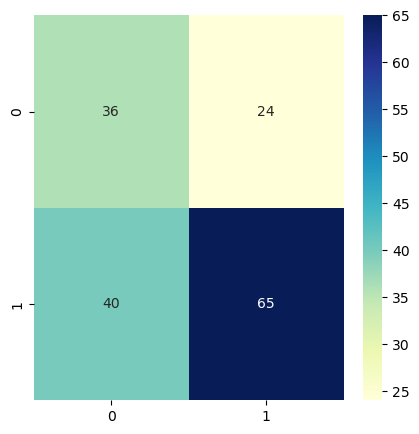

              precision    recall  f1-score   support

           0       0.47      0.60      0.53        60
           1       0.73      0.62      0.67       105

    accuracy                           0.61       165
   macro avg       0.60      0.61      0.60       165
weighted avg       0.64      0.61      0.62       165

roc_auc 0.6095238095238096
------------------------------------------
ROC Curves              = 0.6095238095238096
Precision-Recall Curves = 0.7959044700617735


In [90]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_abs)

## This model:
- New dataframe df2 (have exluced the closure_year column)
- Feature selection: KBest: f_classif k =15
- Robust Scaler to deal with outliers 
- Downsampling 
- Randomg Forest - with class weight 'balanced'      185